In [1]:
from qiskit import *
# To plot the results of the experiments
from qiskit.tools.visualization import plot_histogram
# To monitor the jobs in the real quantum computer
from qiskit.tools.monitor import job_monitor

## Set the IBM account API token (to use real quantum computers)

In [2]:
IBMQ.save_account("bc85fef16c9bddf7661c79558715c1f78c84c0660f45eb031eafebbc6b1d72d7ac081cc795c242bfc6b6fb9f8b8a4aa632c869a0877379a58e24d93dafd28b8b")

Credentials already present. Set overwrite=True to overwrite.


## Create a quantum circuit

In [3]:
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr, cr)

In [6]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

In [7]:
# Hadamard gate
circuit.h(qr[0])

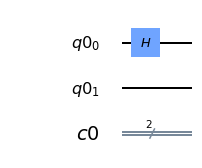

In [8]:
circuit.draw(output="mpl")

In [9]:
# Control not gate
circuit.cx(qr[0], qr[1])

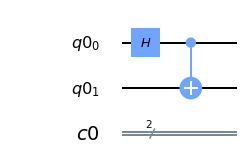

In [10]:
circuit.draw(output="mpl")

In [11]:
# Measure the quantum bits in to the classical bits
circuit.measure(qr, cr)

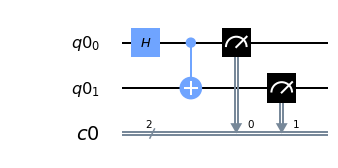

In [12]:
circuit.draw(output="mpl")

## Execute the circuit in a local quantum simulator

In [13]:
# Set backend for execution
simulator = Aer.get_backend("qasm_simulator")

In [14]:
# Execute the circuit and get results
result = execute(circuit, backend=simulator).result()

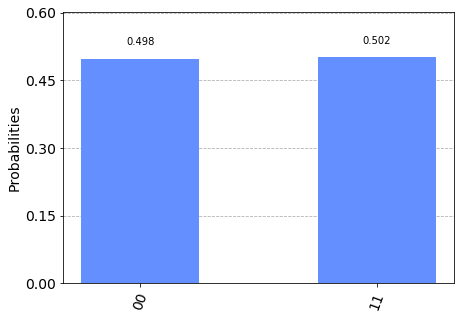

In [15]:
# Plot the results
plot_histogram(result.get_counts(circuit))

## Execute the circuit in a real quantum computer

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
# Set the provider to get access to the quantum computer
provider = IBMQ.get_provider("ibm-q")

In [18]:
# Set the backend to a real quantum computer
qcomp = provider.get_backend("ibmq_16_melbourne")

In [19]:
# Execute the circuit (send the job to the quantum computer)
job = execute(circuit, backend=qcomp)

In [20]:
# Check job status
job_monitor(job)

Job Status: job has successfully run


In [21]:
result = job.result()

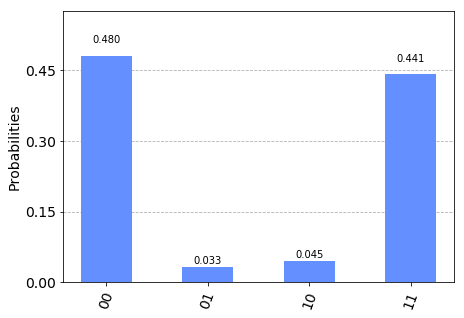

In [22]:
plot_histogram(result.get_counts(circuit))